# **Smoking and Drinking Dataset with body signal** 
## Group number 36
### Submited by: Reuven Weltfried, Reuven Waldman, Eliran levi
#### Link: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset
##### This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded.

<a id='top'></a>

<div>
<img src="https://github.com/reuvenwel/project-1/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%9C%D7%A4%D7%A8%D7%95%D7%99%D7%99%D7%A7%D7%98.jpg?raw=true" width="600"/>
</div>


(לתרגם לאנגלית)
## מבוא:
#### .פרויקט זה נכתב על בסיס קובץ נתונים רפואיים הבוחן פרמטרים פיזיולוגים של קבוצת נבדקים ובנוסף מציין האם כל נבדק  שותה או מעשן  
#### .בפרויקט זה אנו נבחן קשרים בין משתנים שונים וננסה להסיק מסקנות על סמך בחינת התוצרים  


<div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

### <b style='color:black'>  ***Relevant Libraries***</b>




<div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## ***Part One***

**Initial examination of the data and start of data processing**

In [2]:
url1 = "https://raw.githubusercontent.com/reuvenwel/project-1/main/project01.csv"
data_df = pd.read_csv(url1, encoding="utf-8")
data_df.head()

,A,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [3]:
data_df.columns

Index(['A', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [4]:
data_df.shape

(105696, 24)




<div dir="rtl" style="text-align: right;">

### הסבר על העמודות:

- **age**: מעוגל ל-5
- **height**: כנ"ל
- **waistline**: קו מותניים
- **sight_left**: ראיה - 0.1 גרועה, 1 רגילה, מכאן ואילך זה רמות ראייה חריגות באיכותן עד 9.9
- **hear_left**: אחד טוב, שתיים לא 
- **SBP**: לחץ דם גבוה ביותר
- **DBP**: לחץ דם נמוך ביותר
- **BLDS**: גלוקוז בדם בצום
- **tot_chole**: סה"כ כולסטרול
- **HDL cholesterol**: כולסטרול טוב
- **LDL_chole**: כולסטרול רע
- **triglyceride**: טריגליצרידים הם צורת אחסון האנרגיה העיקרית בגוף - סוג של שומן הנמצא בדם ומשמש כמקור אנרגיה. אצל אדם בריא רמות הטריגליצרידים נשמרות תקינות ומאוזנות, אך כשרמת טריגליצרידים הופכת לגבוהה בדם (Hypertriglyceridemia) היא עלולה להגביר את הסיכון ללקות במחלות לב ולהוות סימפטום של תסמונת מטבולית כלשהי.
- **hemoglobin**: המוגלובין
- **urine_protein**: חלבון בשתן - כליות בריאות ומתפקדות לא מאפשרות לחלבון לעבור דרך המסננים שלהן. לכן, כאשר מתגלות בשתן כמויות חלבון לא רגילות, מה שבעגה מקצועית נקרא "פרוטאינוריה", סימן כי קיימת בעיה כלשהי, כאשר לרוב מדובר על נזק כלייתי.
- **serum_creatinine**: 
  - גברים: 0.67 עד 1.17 מיליגרם לדציליטר
  - נשים: 0.51 עד 0.95 מיליגרם לדציליטר
  - ערכי קריאטינין גבוהים מהנורמה עלולים להצביע על תפקוד לקוי של הכליות, אך חריגה קלה יכולה להיות גם תוצאה של התייבשות.
  - ערכי קריאטינין נמוכים מהנורמה עלולים להצביע על מחלות שריר מסוימות. תוצאה נמוכה עשויה להתקבל גם במצבים של מסת שריר נמוכה מאוד ובמצבים של תת־תזונה.
- **SGOT_AST**: אנזים זה מכונה גם טראנסאמינאז (SGOT) והוא נמצא בעיקר בכבד, בשריר הלב ובשרירים. תפקידו העיקרי של האנזים AST הוא מטבוליזם של החומצה האמינית אספארטאט. נזק לתאים המכילים אנזים זה יגרום לעליה ברמתו בדם.
- **SGOT_ALT**: הוא אנזים שמצוי בכבד וברקמות נוספות בגוף. האנזים משתחרר לדם כאשר נפגעים התאים שבהם הוא נמצא. פעילות האנזים גבוהה פי 10 בכבד בהשוואה לפעילותו ברקמות אחרות, ולכן עלייה בשיעורו בדם מעלה את החשד לקיומן של מחלות כבד.
- **gamma_GTP**: את רמת האנזים GGT (גמא־גלוטמיל טרנספפטידאז) בדם. האנזים מתרכז במיוחד בכבד, בדרכי המרה ובכליות. הוא משוחרר לדם כאשר תאים שמכילים אותו נפגעים. כאשר עולה חשד למחלה בכבד או בדרכי המרה או כדי לוודא שנטילת תרופות מסוימות אינה משפיעה לרעה על תפקוד הכבד.
- **SMK_stat_type_cd**: מצב עישון - 1 (לעולם לא), 2 (נהג לעשן אבל הפסיק), 3 (עדיין מעשן)
- **DRK_YN**: שותה או לא

</div>






<div dir="rtl" style="text-align: right;">

### הסבר על העמודות:

- **age**: מעוגל ל-5
- **height**: כנ"ל
- **waistline**: קו מותניים
- **sight_left**: ראיה - 0.1 גרועה, 1 רגילה, מכאן ואילך זה רמות ראייה חריגות באיכותן עד 9.9
- **hear_left**: אחד טוב, שתיים לא 
- **SBP**: לחץ דם גבוה ביותר
- **DBP**: לחץ דם נמוך ביותר
- **BLDS**: גלוקוז בדם בצום
- **tot_chole**: סה"כ כולסטרול
- **HDL cholesterol**: כולסטרול טוב
- **LDL_chole**: כולסטרול רע
- **triglyceride**: טריגליצרידים הם צורת אחסון האנרגיה העיקרית בגוף - סוג של שומן הנמצא בדם ומשמש כמקור אנרגיה. אצל אדם בריא רמות הטריגליצרידים נשמרות תקינות ומאוזנות, אך כשרמת טריגליצרידים הופכת לגבוהה בדם (Hypertriglyceridemia) היא עלולה להגביר את הסיכון ללקות במחלות לב ולהוות סימפטום של תסמונת מטבולית כלשהי.
- **hemoglobin**: המוגלובין
- **urine_protein**: חלבון בשתן - כליות בריאות ומתפקדות לא מאפשרות לחלבון לעבור דרך המסננים שלהן. לכן, כאשר מתגלות בשתן כמויות חלבון לא רגילות, מה שבעגה מקצועית נקרא "פרוטאינוריה", סימן כי קיימת בעיה כלשהי, כאשר לרוב מדובר על נזק כלייתי.
- **serum_creatinine**: 
  - גברים: 0.67 עד 1.17 מיליגרם לדציליטר
  - נשים: 0.51 עד 0.95 מיליגרם לדציליטר
  - ערכי קריאטינין גבוהים מהנורמה עלולים להצביע על תפקוד לקוי של הכליות, אך חריגה קלה יכולה להיות גם תוצאה של התייבשות.
  - ערכי קריאטינין נמוכים מהנורמה עלולים להצביע על מחלות שריר מסוימות. תוצאה נמוכה עשויה להתקבל גם במצבים של מסת שריר נמוכה מאוד ובמצבים של תת־תזונה.
- **SGOT_AST**: אנזים זה מכונה גם טראנסאמינאז (SGOT) והוא נמצא בעיקר בכבד, בשריר הלב ובשרירים. תפקידו העיקרי של האנזים AST הוא מטבוליזם של החומצה האמינית אספארטאט. נזק לתאים המכילים אנזים זה יגרום לעליה ברמתו בדם.
- **SGOT_ALT**: הוא אנזים שמצוי בכבד וברקמות נוספות בגוף. האנזים משתחרר לדם כאשר נפגעים התאים שבהם הוא נמצא. פעילות האנזים גבוהה פי 10 בכבד בהשוואה לפעילותו ברקמות אחרות, ולכן עלייה בשיעורו בדם מעלה את החשד לקיומן של מחלות כבד.
- **gamma_GTP**: את רמת האנזים GGT (גמא־גלוטמיל טרנספפטידאז) בדם. האנזים מתרכז במיוחד בכבד, בדרכי המרה ובכליות. הוא משוחרר לדם כאשר תאים שמכילים אותו נפגעים. כאשר עולה חשד למחלה בכבד או בדרכי המרה או כדי לוודא שנטילת תרופות מסוימות אינה משפיעה לרעה על תפקוד הכבד.
- **SMK_stat_type_cd**: מצב עישון - 1 (לעולם לא), 2 (נהג לעשן אבל הפסיק), 3 (עדיין מעשן)
- **DRK_YN**: שותה או לא

</div>



**Missing values (NaNs) check:**

In [5]:
data_df.isnull().sum()

A                   0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

**The data type:**

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105696 entries, 0 to 105695
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   A                 105696 non-null  object 
 1   age               105696 non-null  int64  
 2   height            105696 non-null  int64  
 3   weight            105696 non-null  int64  
 4   waistline         105696 non-null  float64
 5   sight_left        105696 non-null  float64
 6   sight_right       105696 non-null  float64
 7   hear_left         105696 non-null  int64  
 8   hear_right        105696 non-null  int64  
 9   SBP               105696 non-null  int64  
 10  DBP               105696 non-null  int64  
 11  BLDS              105696 non-null  int64  
 12  tot_chole         105696 non-null  int64  
 13  HDL_chole         105696 non-null  int64  
 14  LDL_chole         105696 non-null  int64  
 15  triglyceride      105696 non-null  int64  
 16  hemoglobin        10

In [7]:
data_df['A']

0           Male
1           Male
2           Male
3           Male
4           Male
           ...  
105691    Female
105692    Female
105693      Male
105694      Male
105695      Male
Name: A, Length: 105696, dtype: object

In [8]:
# Changing objects into numbers to analyze the information
# I change the Y and N to 1 and 0 to appear on the correlation map

In [9]:
data_df['DRK_YN'] = data_df['DRK_YN'].map({'Y': 1, 'N': 0})
data_df['A'] = data_df['A'].map({'Male': 0, 'Female': 1})


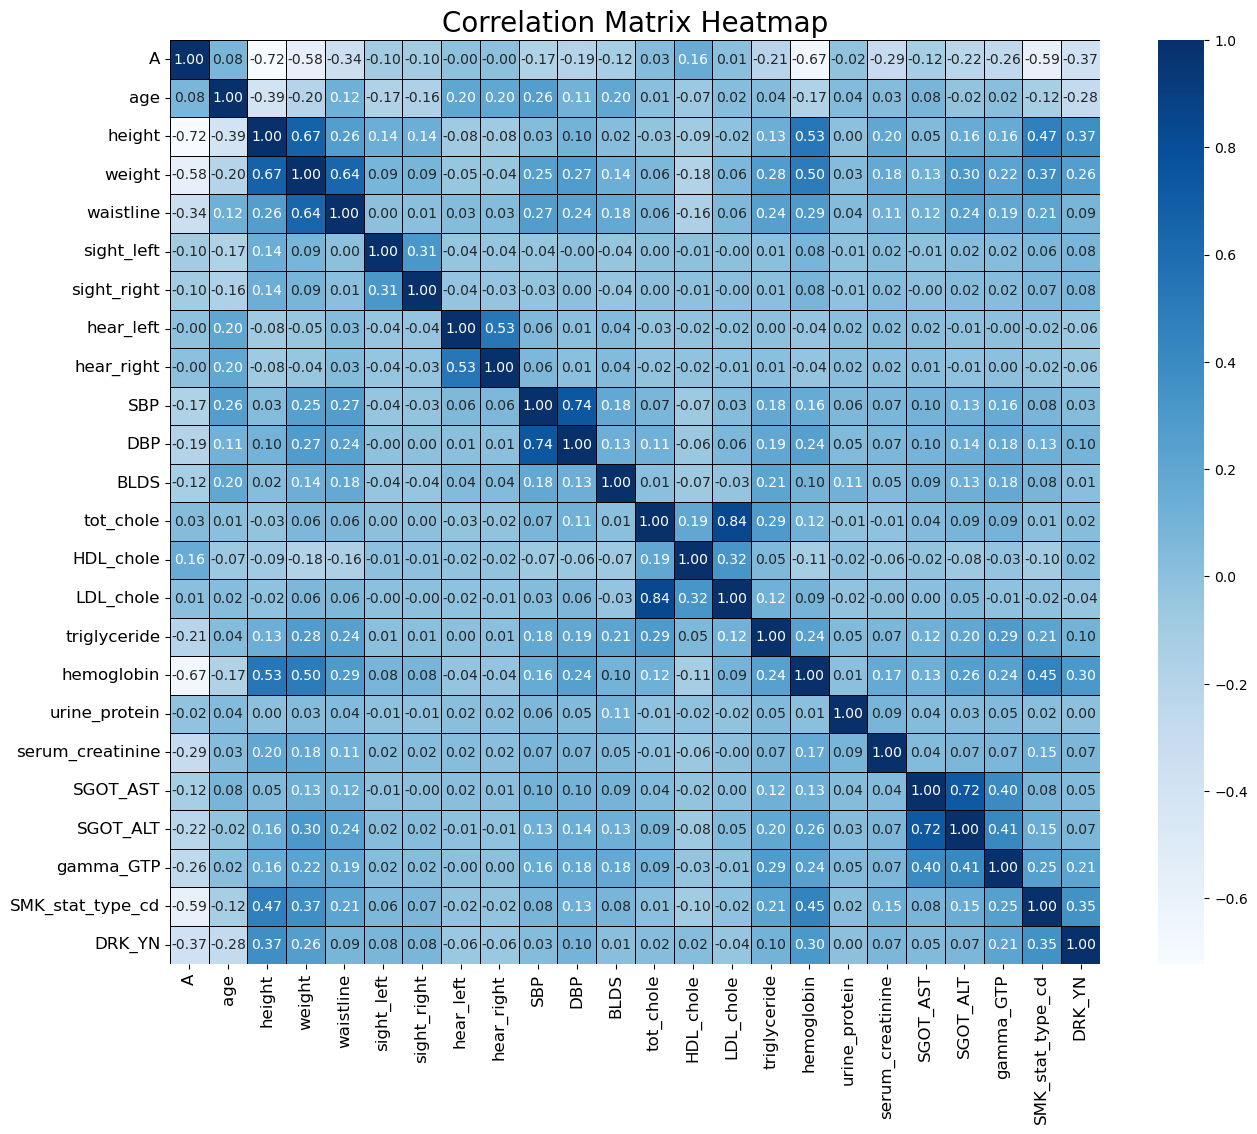

In [10]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(15, 12)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, linecolor='black', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
data_df.describe()

,A,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,...,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000
mean,0.468438,47.610174,162.263567,63.306275,81.259668,0.981420,0.981211,1.031288,1.030465,122.427367,...,113.013227,132.262744,14.230533,1.094649,0.859514,25.940745,25.738883,36.957189,1.611556,0.500341
std,0.499005,14.173750,9.276180,12.535107,11.836500,0.608456,0.616991,0.174095,0.171863,14.500863,...,38.008990,106.665497,1.580306,0.435250,0.409780,18.306402,23.715101,48.987411,0.819511,0.500002
min,0.000000,20.000000,130.000000,25.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,0.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,1.000000
75%,1.000000,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,39.000000,2.000000,1.000000
max,1.000000,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,232.000000,...,5119.000000,9490.000000,21.000000,6.000000,81.000000,1911.000000,2309.000000,999.000000,3.000000,1.000000


**Division by age:**

In [12]:
def age (series):
    if series < 35:
        return "20-35"
    elif 35 <= series <= 45:
        return "35-45"
    elif 45 < series <= 60:
        return "45-60"
    elif 60 < series:
        return "60+"

In [13]:
data_df["aeg_group"] = 0
data_df["aeg_group"] = data_df["age"].apply(age)
data_df["aeg_group"].unique()

array(['35-45', '20-35', '45-60', '60+'], dtype=object)

In [14]:
data_df

,A,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,aeg_group
0,0,35,170,75,90.0,1.0,1.0,1,1,120,...,92,17.1,1,1.0,21,35,40,1,1,35-45
1,0,30,180,80,89.0,0.9,1.2,1,1,130,...,121,15.8,1,0.9,20,36,27,3,0,20-35
2,0,40,165,75,91.0,1.2,1.5,1,1,120,...,104,15.8,1,0.9,47,32,68,1,0,35-45
3,0,50,175,80,91.0,1.5,1.2,1,1,145,...,106,17.6,1,1.1,29,34,18,1,0,45-60
4,0,50,165,60,80.0,1.0,1.2,1,1,138,...,104,13.8,1,0.8,19,12,25,1,0,45-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105691,1,60,150,50,75.0,1.0,0.8,1,1,130,...,93,12.4,1,0.5,25,14,10,1,0,45-60
105692,1,30,155,55,76.2,0.7,0.8,1,1,102,...,38,12.1,1,0.8,19,11,12,1,1,20-35
105693,0,65,165,65,82.0,0.4,0.9,1,1,133,...,87,14.0,1,1.0,30,22,20,1,1,60+
105694,0,25,170,60,72.0,1.2,1.5,1,1,131,...,54,16.5,1,1.1,19,17,17,1,1,20-35


data_df['A'] = data_df['A'].map({0: 'Male', 1: 'Female'})
#### **Physical health according to the BMI index**

- **Underweight**: BMI less than 18.5
- **Normal Weight**: BMI between 18.5 and 24.9
- **Overweight**: BMI between 25 and 29.9
- **Obesity**: BMI 30 and above


In [15]:
data_df['A'] = data_df['A'].map({0: 'Male', 1: 'Female'})


In [16]:
def BMI (series):
    if series < 18.5:
        return "underweight"
    elif 18.5 <= series <= 24.9:
        return "healthy weight"
    elif 25 <= series <= 29.9:
        return "overweight"
    elif 29.9 < series:
        return "obesity"
    

In [17]:
data_df["BMI"] = 0
i = 0
while i < 105696: 
    a = data_df.loc[i,"height"]
    b = data_df.loc[i,"weight"]
    c = a/100
    d = b/(c*c)
    data_df.loc[i,"BMI_value"] = d
    i += 1
data_df["BMI"] = data_df["BMI_value"].apply(BMI)

In [18]:
data_df['gender'] = data_df['A']

In [19]:
new_order = ['gender', 'age',"aeg_group", 'height', 'weight','BMI_value', 'BMI',  'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'] 
data_df = data_df.reindex(columns=new_order)
data_df

,gender,age,aeg_group,height,weight,BMI_value,BMI,waistline,sight_left,sight_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,35-45,170,75,25.951557,overweight,90.0,1.0,1.0,...,126,92,17.1,1,1.0,21,35,40,1,1
1,Male,30,20-35,180,80,24.691358,healthy weight,89.0,0.9,1.2,...,148,121,15.8,1,0.9,20,36,27,3,0
2,Male,40,35-45,165,75,27.548209,overweight,91.0,1.2,1.5,...,74,104,15.8,1,0.9,47,32,68,1,0
3,Male,50,45-60,175,80,26.122449,overweight,91.0,1.5,1.2,...,104,106,17.6,1,1.1,29,34,18,1,0
4,Male,50,45-60,165,60,22.038567,healthy weight,80.0,1.0,1.2,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105691,Female,60,45-60,150,50,22.222222,healthy weight,75.0,1.0,0.8,...,66,93,12.4,1,0.5,25,14,10,1,0
105692,Female,30,20-35,155,55,22.892820,healthy weight,76.2,0.7,0.8,...,81,38,12.1,1,0.8,19,11,12,1,1
105693,Male,65,60+,165,65,23.875115,healthy weight,82.0,0.4,0.9,...,154,87,14.0,1,1.0,30,22,20,1,1
105694,Male,25,20-35,170,60,20.761246,healthy weight,72.0,1.2,1.5,...,102,54,16.5,1,1.1,19,17,17,1,1


In [20]:
data_df


,gender,age,aeg_group,height,weight,BMI_value,BMI,waistline,sight_left,sight_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,35-45,170,75,25.951557,overweight,90.0,1.0,1.0,...,126,92,17.1,1,1.0,21,35,40,1,1
1,Male,30,20-35,180,80,24.691358,healthy weight,89.0,0.9,1.2,...,148,121,15.8,1,0.9,20,36,27,3,0
2,Male,40,35-45,165,75,27.548209,overweight,91.0,1.2,1.5,...,74,104,15.8,1,0.9,47,32,68,1,0
3,Male,50,45-60,175,80,26.122449,overweight,91.0,1.5,1.2,...,104,106,17.6,1,1.1,29,34,18,1,0
4,Male,50,45-60,165,60,22.038567,healthy weight,80.0,1.0,1.2,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105691,Female,60,45-60,150,50,22.222222,healthy weight,75.0,1.0,0.8,...,66,93,12.4,1,0.5,25,14,10,1,0
105692,Female,30,20-35,155,55,22.892820,healthy weight,76.2,0.7,0.8,...,81,38,12.1,1,0.8,19,11,12,1,1
105693,Male,65,60+,165,65,23.875115,healthy weight,82.0,0.4,0.9,...,154,87,14.0,1,1.0,30,22,20,1,1
105694,Male,25,20-35,170,60,20.761246,healthy weight,72.0,1.2,1.5,...,102,54,16.5,1,1.1,19,17,17,1,1


In [21]:
data_df["age"].max()

85

In [22]:
male_df = data_df[data_df["gender"] == "Male"]
female_df = data_df[data_df["gender"] == "Female"]


In [23]:
male_df["BMI"].value_counts()

BMI
healthy weight    30534
overweight        20752
obesity            2981
underweight        1344
Name: count, dtype: int64

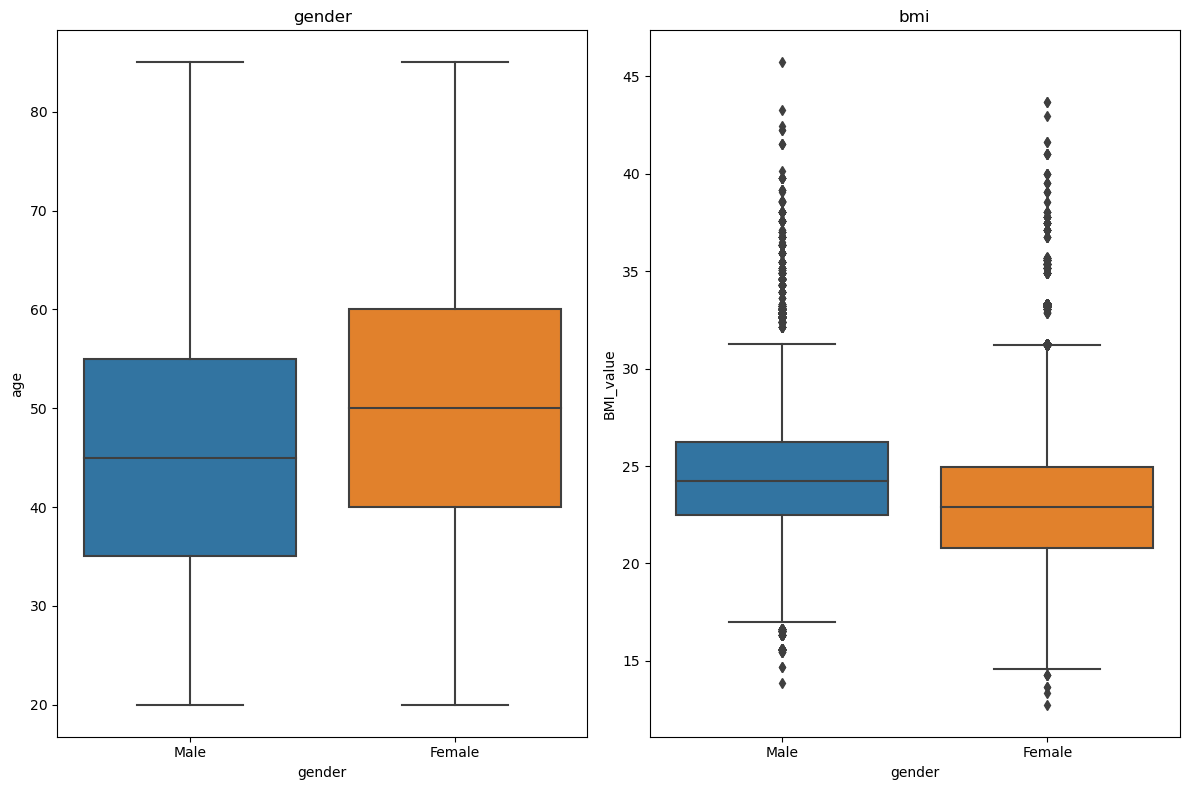

In [24]:
fig, axes = plt.subplots(ncols = 2, figsize=(12, 8))

sns.boxplot(y="age", x="gender", data=data_df, ax = axes[0])
sns.boxplot(y="BMI_value", x="gender", data=data_df, ax = axes[1])

axes[0].set_title('gender')
axes[1].set_title('bmi')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

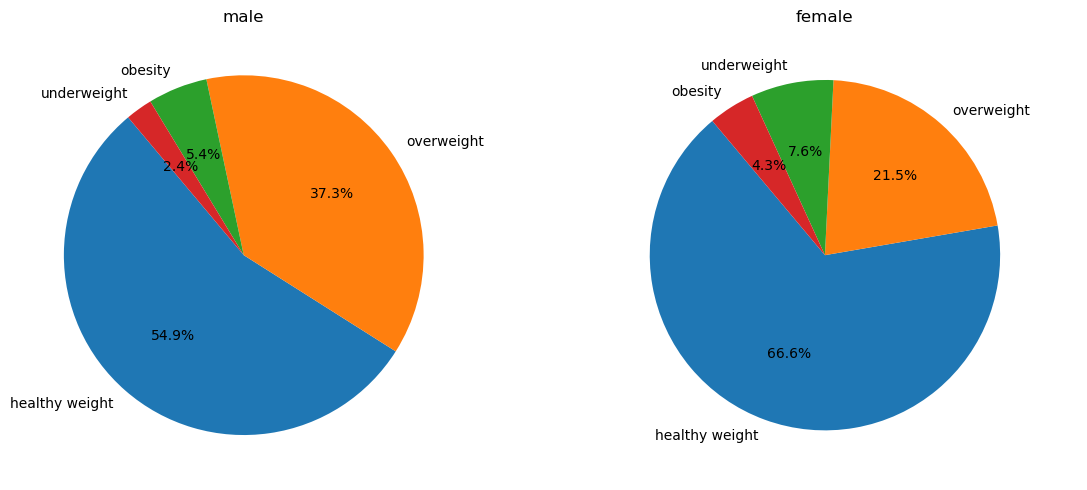

In [25]:
male_bmi = male_df["BMI"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.pie( male_bmi, labels=male_bmi.index, autopct='%1.1f%%', startangle=130)
ax1.set_title("male")
femal_bmi= female_df["BMI"].value_counts()
ax2.pie(femal_bmi, labels=femal_bmi.index, autopct='%1.1f%%', startangle=130)
ax2.set_title('female')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2, wspace=0.8, hspace=0.5)


plt.axis('equal')
plt.tight_layout()
plt.show()

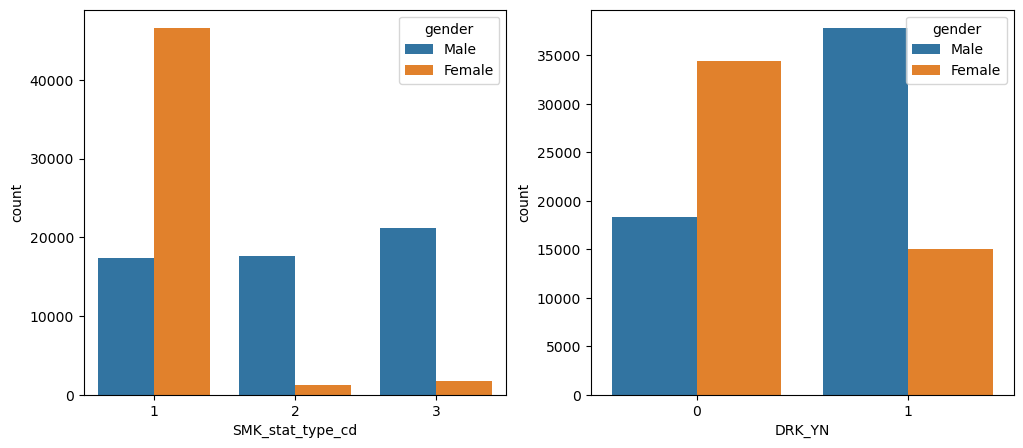

In [26]:
fig, axes = plt.subplots(ncols = 2, figsize=(12, 5))
sns.countplot(x='SMK_stat_type_cd', hue='gender', data=data_df, ax = axes[0] )
sns.countplot(x='DRK_YN', hue='gender', data=data_df, ax = axes[1])
plt.show()

In [27]:
group_1 = male_df[male_df["aeg_group"] == "20-35"]
group_2 = male_df[male_df["aeg_group"] == "35-45"]
group_3 = male_df[male_df["aeg_group"] == "45-60"]
group_4 = male_df[male_df["aeg_group"] == "60+"]

ניצור קבוצות של מדדים ממוצעים לפי גיל

In [28]:
df_drk1 = group_1.groupby('aeg_group').agg({'BMI_value': ['mean'],'SGOT_AST':['mean'], 'SGOT_ALT': ['mean'],'HDL_chole': ['mean'], 'LDL_chole':['mean']})
df_drk2 = group_2.groupby('aeg_group').agg({'BMI_value': ['mean'],'SGOT_AST':['mean'], 'SGOT_ALT': ['mean'],'HDL_chole': ['mean'], 'LDL_chole':['mean']})
df_drk3 = group_3.groupby('aeg_group').agg({'BMI_value': ['mean'],'SGOT_AST':['mean'], 'SGOT_ALT': ['mean'],'HDL_chole': ['mean'], 'LDL_chole':['mean']})
df_drk4 = group_4.groupby('aeg_group').agg({'BMI_value': ['mean'],'SGOT_AST':['mean'], 'SGOT_ALT': ['mean'],'HDL_chole': ['mean'], 'LDL_chole':['mean']})

## ***Part two***

**conclusions that arise from the data**

### <b id="section_2">  </b> <b style='color:#bauk'>1. • Is drinking or smoking harmful to your health? </b> <b></b> 

#### <b id="section_2">  </b> <b style='color:blauk'>1. Does alcohol affect cholesterol </b> <b></b> 

<span style="color: green;">Testing in men</span>


<Figure size 2000x1200 with 0 Axes>

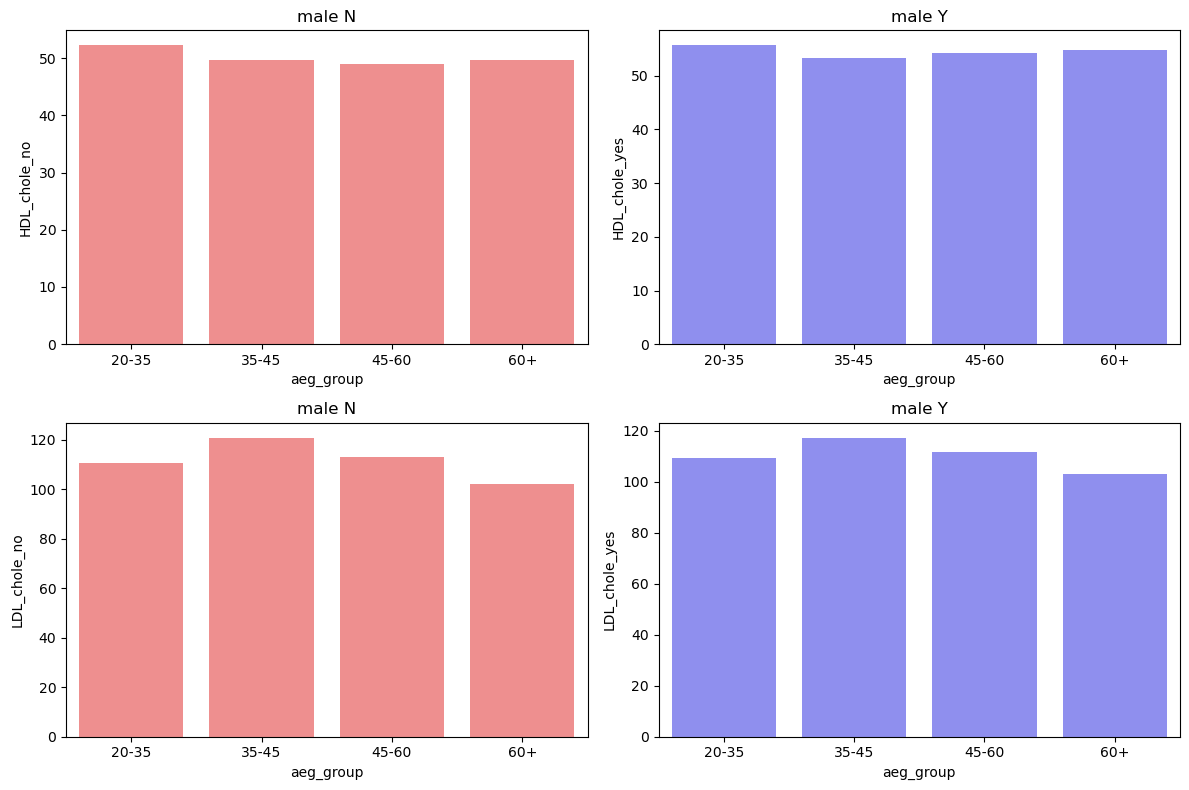

In [29]:
# HDL_chole = good chole
# LDL_chole = bed chole

plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(2,2, figsize=(12, 8))

male_df1 = male_df[male_df["HDL_chole"]<300]
male_df1 = male_df1[male_df1["LDL_chole"]<300]
male_df1 = male_df1[male_df1["DRK_YN"] == 0]
male_df2 = male_df[male_df["HDL_chole"]<300]
male_df2 = male_df2[male_df2["LDL_chole"]<300]
male_df2 = male_df2[male_df2["DRK_YN"] == 1]

male_df1_av = male_df1.groupby('aeg_group')['HDL_chole'].mean()
male_df1_l_av = male_df1.groupby('aeg_group')['LDL_chole'].mean()

male_df2_av = male_df2.groupby('aeg_group')['HDL_chole'].mean()
male_df2_l_av = male_df2.groupby('aeg_group')['LDL_chole'].mean()


male_df1_av= male_df1_av.to_frame(name="HDL_chole_no").reset_index()
male_df1_l_av= male_df1_l_av.to_frame(name="LDL_chole_no").reset_index()

male_df2_av= male_df2_av.to_frame(name="HDL_chole_yes").reset_index()
male_df2_l_av= male_df2_l_av.to_frame(name="LDL_chole_yes").reset_index()


sns.barplot(ax=axes[0,0], x=male_df1_av["aeg_group"], y=male_df1_av["HDL_chole_no"], color='red', alpha=0.5)
sns.barplot(ax=axes[0,1], x=male_df2_av["aeg_group"], y=male_df2_av["HDL_chole_yes"], color='blue', alpha=0.5)

sns.barplot(ax=axes[1,0], x=male_df1_l_av["aeg_group"], y=male_df1_l_av["LDL_chole_no"], color='red', alpha=0.5)
sns.barplot(ax=axes[1,1], x=male_df2_l_av["aeg_group"], y=male_df2_l_av["LDL_chole_yes"], color='blue', alpha=0.5)

axes[0,0].set_title('male N')
axes[1,0].set_title('male N')
axes[0,1].set_title('male Y')
axes[1,1].set_title('male Y')
plt.tight_layout()
plt.show()

<Figure size 2000x1200 with 0 Axes>

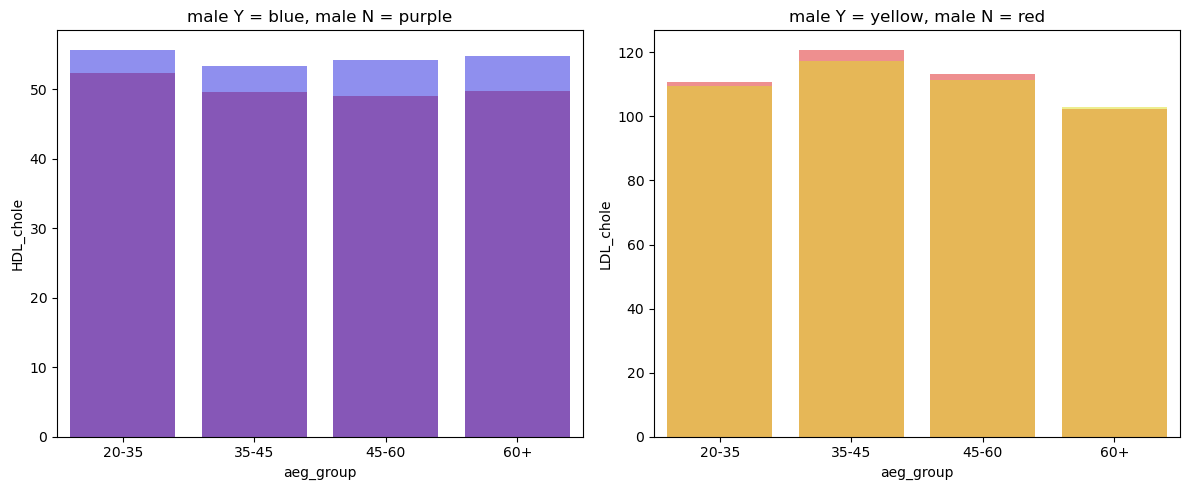

In [30]:
# HDL_chole = good chole
# LDL_chole = bed chole

plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(ncols = 2, figsize=(12, 5))

male_df1 = male_df[male_df["HDL_chole"]<300]
male_df1 = male_df1[male_df1["LDL_chole"]<300]
male_df1 = male_df1[male_df1["DRK_YN"] == 0]
male_df2 = male_df[male_df["HDL_chole"]<300]
male_df2 = male_df2[male_df2["LDL_chole"]<300]
male_df2 = male_df2[male_df2["DRK_YN"] == 1]

male_df1_av = male_df1.groupby('aeg_group')['HDL_chole'].mean()
male_df1_l_av = male_df1.groupby('aeg_group')['LDL_chole'].mean()

male_df2_av = male_df2.groupby('aeg_group')['HDL_chole'].mean()
male_df2_l_av = male_df2.groupby('aeg_group')['LDL_chole'].mean()


male_df1_av= male_df1_av.to_frame(name="HDL_chole").reset_index()
male_df1_l_av= male_df1_l_av.to_frame(name="LDL_chole").reset_index()

male_df2_av= male_df2_av.to_frame(name="HDL_chole").reset_index()
male_df2_l_av= male_df2_l_av.to_frame(name="LDL_chole").reset_index()


sns.barplot(ax=axes[0], x=male_df1_av["aeg_group"], y=male_df1_av["HDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[0], x=male_df2_av["aeg_group"], y=male_df2_av["HDL_chole"], color='blue', alpha=0.5)

sns.barplot(ax=axes[1], x=male_df1_l_av["aeg_group"], y=male_df1_l_av["LDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[1], x=male_df2_l_av["aeg_group"], y=male_df2_l_av["LDL_chole"], color='yellow', alpha=0.5)

axes[0].set_title('male Y = blue, male N = purple')
axes[1].set_title('male Y = yellow, male N = red')
plt.tight_layout()
plt.show()

ניתן לראות שבכל הגילאים הכולסטרול הטוב אצל הגברים ששותים גבוה יותר בפער משמעותי בגילאים המבוגרים, בעוד בכולסטרול הרע רק בגילאים מסוייימים יש השפעה לטובה של השתייה אך ככל שהאדם הולך ומתבגר ההשפעה פוחתת

<span style="color: green;">Testing in women</span>


<Figure size 2000x1200 with 0 Axes>

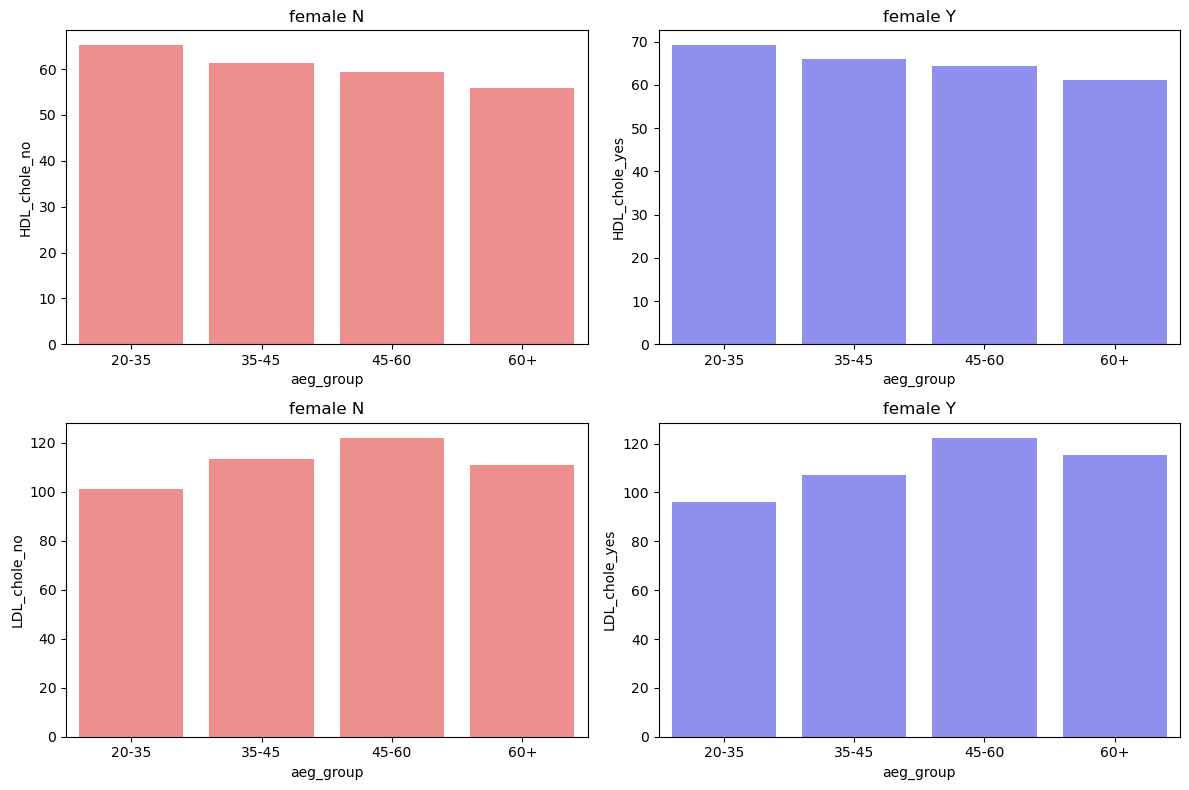

In [32]:
# HDL_chole = good chole
# LDL_chole = bed chole

plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(2,2, figsize=(12, 8))

female_df1 = female_df[female_df["HDL_chole"]<300]
female_df1 = female_df1[female_df1["LDL_chole"]<300]
female_df1 = female_df1[female_df1["DRK_YN"] == 0]
female_df2 = female_df[female_df["HDL_chole"]<300]
female_df2 = female_df2[female_df2["LDL_chole"]<300]
female_df2 = female_df2[female_df2["DRK_YN"] == 1]

female_df1_av = female_df1.groupby('aeg_group')['HDL_chole'].mean()
female_df1_l_av = female_df1.groupby('aeg_group')['LDL_chole'].mean()

female_df2_av = female_df2.groupby('aeg_group')['HDL_chole'].mean()
female_df2_l_av = female_df2.groupby('aeg_group')['LDL_chole'].mean()


female_df1_av= female_df1_av.to_frame(name="HDL_chole_no").reset_index()
female_df1_l_av= female_df1_l_av.to_frame(name="LDL_chole_no").reset_index()

female_df2_av= female_df2_av.to_frame(name="HDL_chole_yes").reset_index()
female_df2_l_av= female_df2_l_av.to_frame(name="LDL_chole_yes").reset_index()


sns.barplot(ax=axes[0,0], x=female_df1_av["aeg_group"], y=female_df1_av["HDL_chole_no"], color='red', alpha=0.5)
sns.barplot(ax=axes[0,1], x=female_df2_av["aeg_group"], y=female_df2_av["HDL_chole_yes"], color='blue', alpha=0.5)

sns.barplot(ax=axes[1,0], x=female_df1_l_av["aeg_group"], y=female_df1_l_av["LDL_chole_no"], color='red', alpha=0.5)
sns.barplot(ax=axes[1,1], x=female_df2_l_av["aeg_group"], y=female_df2_l_av["LDL_chole_yes"], color='blue', alpha=0.5)

axes[0,0].set_title('female N')
axes[1,0].set_title('female N')
axes[0,1].set_title('female Y')
axes[1,1].set_title('female Y')
plt.tight_layout()
plt.show()

<Figure size 2000x1200 with 0 Axes>

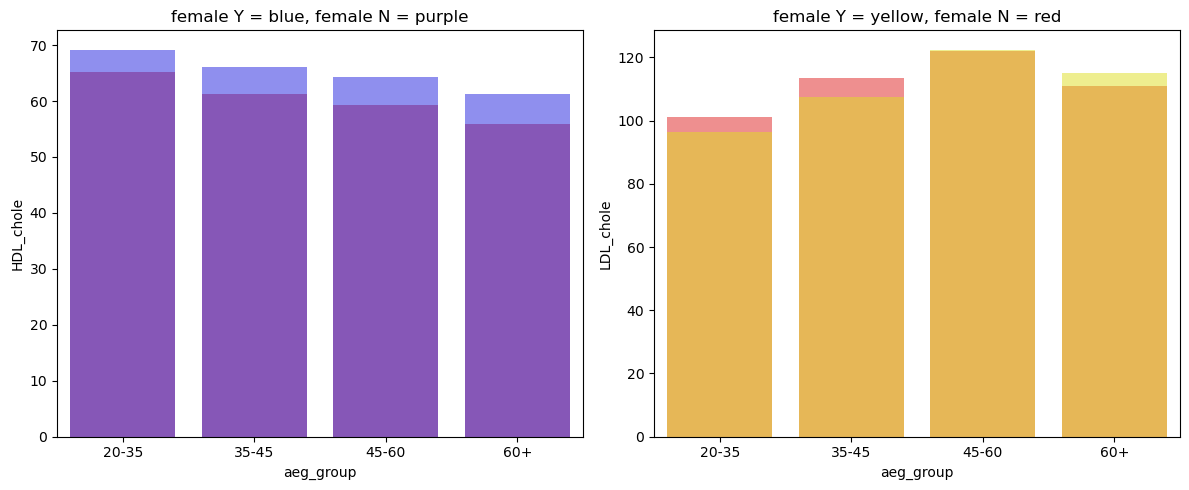

In [33]:
# HDL_chole = good chole
# LDL_chole = bed chole

plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(ncols = 2, figsize=(12, 5))

female_df1 = female_df[female_df["HDL_chole"]<300]
female_df1 = female_df1[female_df1["LDL_chole"]<300]
female_df1 = female_df1[female_df1["DRK_YN"] == 0]
female_df2 = female_df[female_df["HDL_chole"]<300]
female_df2 = female_df2[female_df2["LDL_chole"]<300]
female_df2 = female_df2[female_df2["DRK_YN"] == 1]

female_df1_av = female_df1.groupby('aeg_group')['HDL_chole'].mean()
female_df1_l_av = female_df1.groupby('aeg_group')['LDL_chole'].mean()

female_df2_av = female_df2.groupby('aeg_group')['HDL_chole'].mean()
female_df2_l_av = female_df2.groupby('aeg_group')['LDL_chole'].mean()


female_df1_av= female_df1_av.to_frame(name="HDL_chole").reset_index()
female_df1_l_av= female_df1_l_av.to_frame(name="LDL_chole").reset_index()

female_df2_av= female_df2_av.to_frame(name="HDL_chole").reset_index()
female_df2_l_av= female_df2_l_av.to_frame(name="LDL_chole").reset_index()


sns.barplot(ax=axes[0], x=female_df1_av["aeg_group"], y=female_df1_av["HDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[0], x=female_df2_av["aeg_group"], y=female_df2_av["HDL_chole"], color='blue', alpha=0.5)

sns.barplot(ax=axes[1], x=female_df1_l_av["aeg_group"], y=female_df1_l_av["LDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[1], x=female_df2_l_av["aeg_group"], y=female_df2_l_av["LDL_chole"], color='yellow', alpha=0.5)

axes[0].set_title('female Y = blue, female N = purple')
axes[1].set_title('female Y = yellow, female N = red')
plt.tight_layout()
plt.show()

In [34]:
female_df1_av["HDL_chole_yes"] = female_df2_av["HDL_chole_yes"]
female_df1_av["LDL_chole_no"] = female_df1_l_av["LDL_chole_no"]
female_df1_l_av["LDL_chole_yes"] = female_df2_l_av["LDL_chole_yes"]
female_df1_av["LDL_chole_yes"] = female_df1_l_av["LDL_chole_yes"]

female_df1_av

KeyError: 'HDL_chole_yes'

ניתן לראות שבכל הגילאים הכולסטרול הטוב אצל הנשים ששותות גבוה יותר בפער הולך וגבר עם השנים, בעוד בכולסטרול הרע רק בגילאים מסוייימים יש השפעה לטובה של השתייה אך ככל שהאישה הולכת ומתבגרת ההשפעה פוחתת עד שבגילאים מבוגרים הוא ניתן לראות שאצל השותות יש יותר כולסטרול רע




<div dir="rtl" style="text-align: right;">

### לחץ דם מושפע מעישון?:


</div>



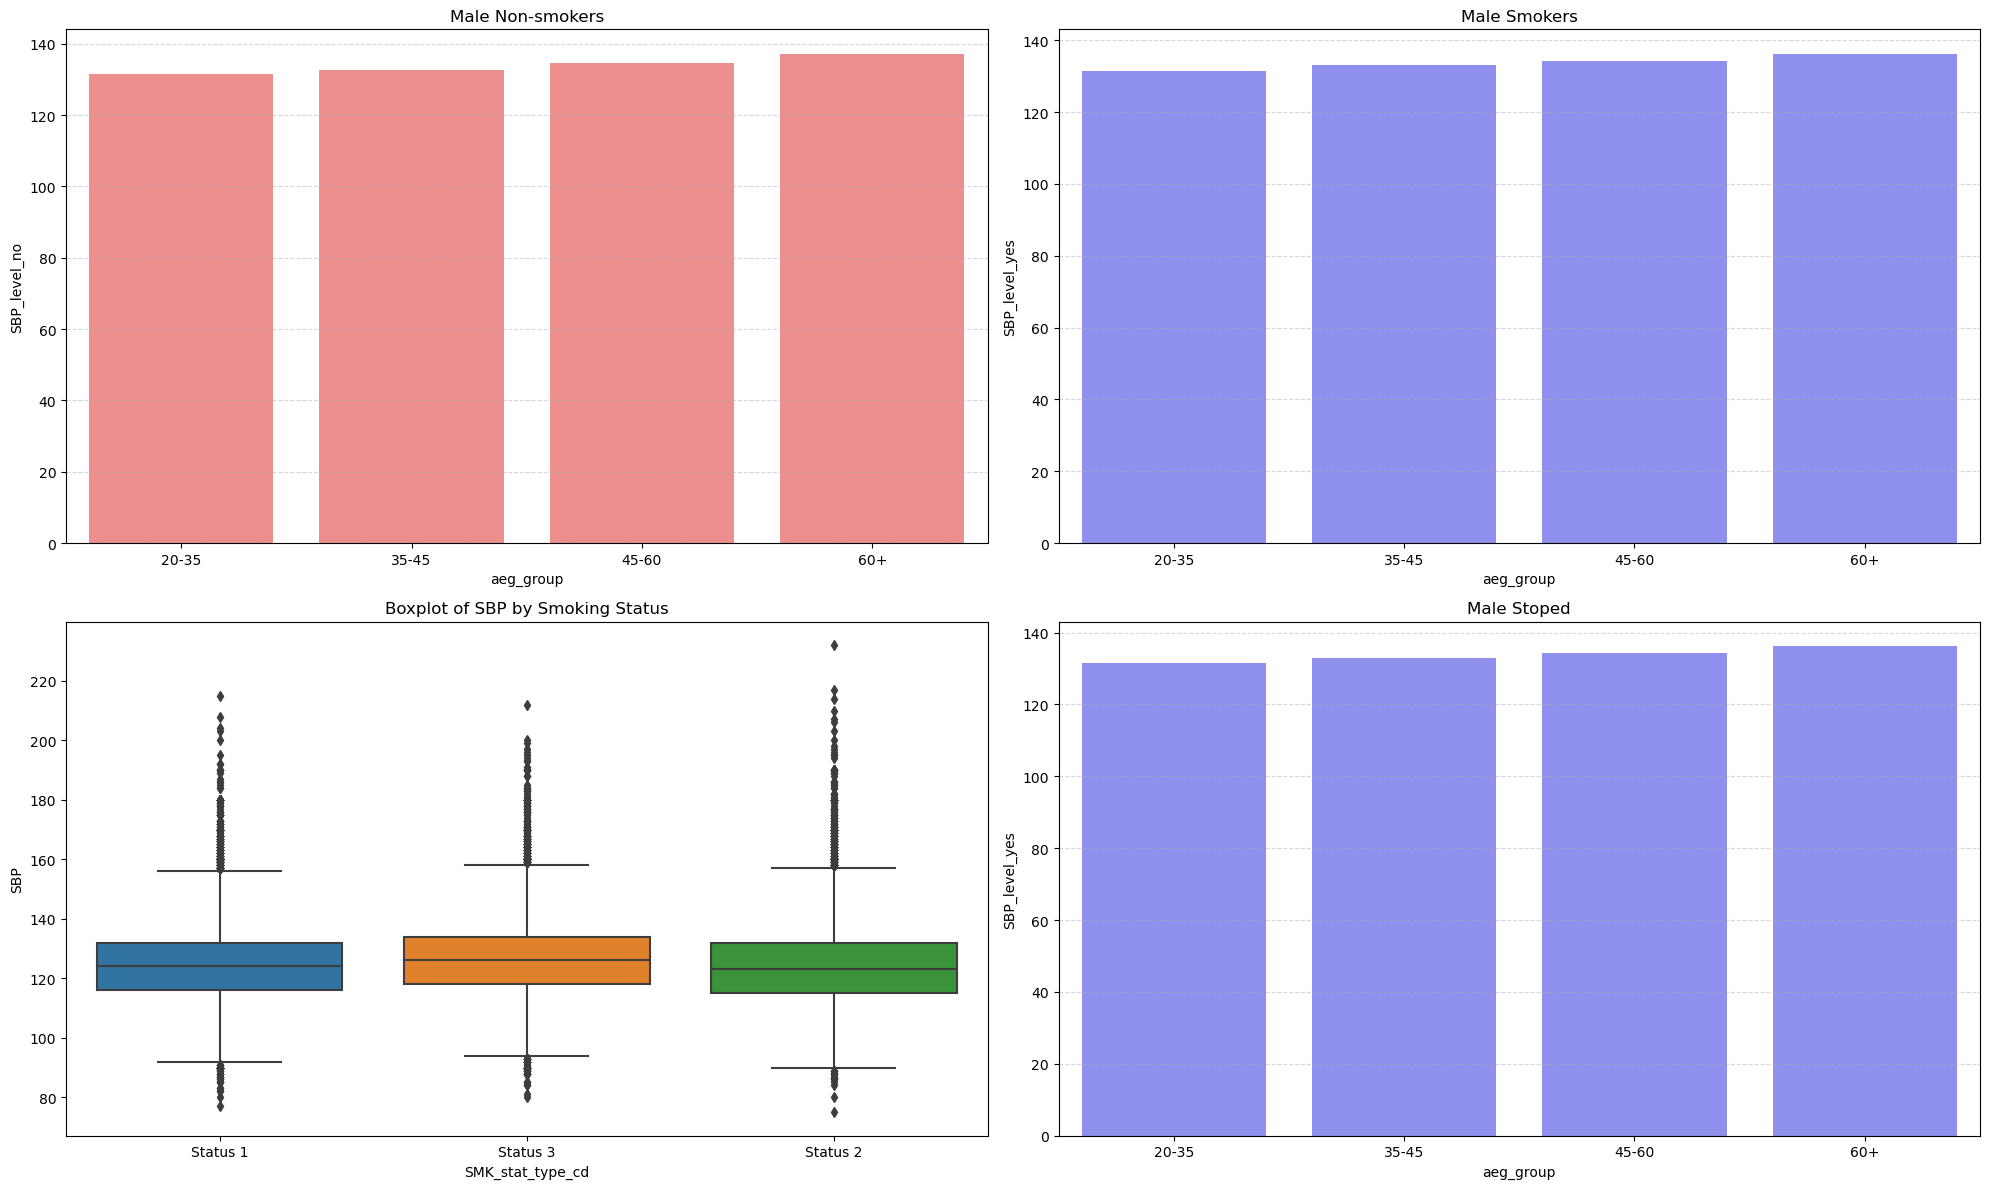

In [35]:
# Filter data
male_he1 = male_df[(male_df["SBP"] > 120) & (male_df["SBP"] < 400) & (male_df["SMK_stat_type_cd"] == 1) ]
male_he3 = male_df[(male_df["SBP"] > 120) & (male_df["SBP"] < 400) & (male_df["SMK_stat_type_cd"] == 3)]
male_he2 = male_df[(male_df["SBP"] > 120) & (male_df["SBP"] < 400) & (male_df["SMK_stat_type_cd"] == 2)]

# Group by age group and calculate mean SBP
male_he1_av = male_he1.groupby('aeg_group')['SBP'].mean().to_frame(name="SBP_level_no").reset_index()
male_he3_av = male_he3.groupby('aeg_group')['SBP'].mean().to_frame(name="SBP_level_yes").reset_index()
male_he2_av = male_he2.groupby('aeg_group')['SBP'].mean().to_frame(name="SBP_level_yes").reset_index()

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot the data
sns.barplot(ax=axes[0, 0], x=male_he1_av["aeg_group"], y=male_he1_av["SBP_level_no"], color='red', alpha=0.5)
sns.barplot(ax=axes[0, 1], x=male_he2_av["aeg_group"], y=male_he2_av["SBP_level_yes"], color='blue', alpha=0.5)
sns.barplot(ax=axes[1, 1], x=male_he2_av["aeg_group"], y=male_he2_av["SBP_level_yes"], color='blue', alpha=0.5)

# Apply gridlines to bar plots
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.5)

# Set titles for the plots
axes[0, 0].set_title('Male Non-smokers')
axes[0, 1].set_title('Male Smokers')
axes[1, 1].set_title('Male Stoped')


# Add boxplots for a more detailed view
sns.boxplot(ax=axes[1, 0], x=male_df["SMK_stat_type_cd"], y=male_df["SBP"])
axes[1, 0].set_title('Boxplot of SBP by Smoking Status')

# Dynamically set the x-tick labels based on unique values in SMK_stat_type_cd
unique_values = male_df["SMK_stat_type_cd"].unique()
tick_labels = [f"Status {int(val)}" for val in unique_values]
axes[1, 0].set_xticklabels(tick_labels)

# Hide the unnecessary subplot
#axes[1, 1].axis('off')


# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Filter data
female_he1 = female_df[(female_df["SBP"] > 120) & (female_df["SBP"] < 400) & (female_df["SMK_stat_type_cd"] == 1) ]
female_he2 = female_df[(female_df["SBP"] > 120) & (female_df["SBP"] < 400) & (female_df["SMK_stat_type_cd"] == 2)]
female_he3 = female_df[(female_df["SBP"] > 120) & (female_df["SBP"] < 400) & (female_df["SMK_stat_type_cd"] == 3)]

# Group by age group and calculate mean SBP
female_he1_av = female_he1.groupby('aeg_group')['SBP'].mean().to_frame(name="SBP_level_no").reset_index()
female_he2_av = female_he2.groupby('aeg_group')['SBP'].mean().to_frame(name="SBP_level_yes").reset_index()
female_he3_av = female_he3.groupby('aeg_group')['SBP'].mean().to_frame(name="SBP_level_yes").reset_index()

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot the data
sns.barplot(ax=axes[0, 0], x=female_he1_av["aeg_group"], y=female_he1_av["SBP_level_no"], color='red', alpha=0.5)
sns.barplot(ax=axes[0, 1], x=female_he2_av["aeg_group"], y=female_he2_av["SBP_level_yes"], color='blue', alpha=0.5)
sns.barplot(ax=axes[1, 1], x=female_he2_av["aeg_group"], y=female_he2_av["SBP_level_yes"], color='blue', alpha=0.5)

# Set titles for the plots
axes[0, 0].set_title('female Non-smokers')
axes[0, 1].set_title('female Smokers')
axes[1, 1].set_title('female Stoped')

# Apply gridlines to bar plots
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.5)

# Add boxplots for a more detailed view
sns.boxplot(ax=axes[1, 0], x=female_df["SMK_stat_type_cd"], y=female_df["SBP"])
axes[1, 0].set_title('Boxplot of SBP by Smoking Status')

# Dynamically set the x-tick labels based on unique values in SMK_stat_type_cd
unique_values = female_df["SMK_stat_type_cd"].unique()
tick_labels = [f"Status {int(val)}" for val in unique_values]
axes[1, 0].set_xticklabels(tick_labels)

# Hide the unnecessary subplot
#axes[1, 1].axis('off')


# Adjust layout
plt.tight_layout()
plt.show()

ניתן לראות שההשפעה של עישון על רמות לחץ הדם מינורית




<div dir="rtl" style="text-align: right;">

### השפעת העישון על רמת הטריגליצרידים בדם:


</div>






<div dir="rtl" style="text-align: right;">

#### גברים:


</div>



In [ ]:
# Filter data
male_gli1 = male_df[(male_df["triglyceride"] < 2000) & (male_df["SMK_stat_type_cd"] == 1)] #never
male_gli2 = male_df[(male_df["triglyceride"] < 2000) & (male_df["SMK_stat_type_cd"] == 2)] #stopped
male_gli3 = male_df[(male_df["triglyceride"] < 2000) & (male_df["SMK_stat_type_cd"] == 3)] #smoker

# Group by age group and calculate mean triglyceride
male_gli1_av = male_gli1.groupby('aeg_group')['triglyceride'].mean().to_frame(name="triglyceride_no").reset_index()
male_gli2_av = male_gli2.groupby('aeg_group')['triglyceride'].mean().to_frame(name="triglyceride_yes").reset_index()
male_gli3_av = male_gli3.groupby('aeg_group')['triglyceride'].mean().to_frame(name="triglyceride_yes").reset_index()

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot the data using barplots
sns.barplot(ax=axes[0, 0], x=male_gli1_av["aeg_group"], y=male_gli1_av["triglyceride_no"], color='green', alpha=0.5)
sns.barplot(ax=axes[1, 1], x=male_gli2_av["aeg_group"], y=male_gli2_av["triglyceride_yes"], color='blue', alpha=0.5)
sns.barplot(ax=axes[0, 1], x=male_gli3_av["aeg_group"], y=male_gli3_av["triglyceride_yes"], color='brown', alpha=0.5)

# Set y-axis limits for better comparison
axes[0, 0].set_ylim(60, 200)
axes[0, 1].set_ylim(60, 200)
axes[1, 1].set_ylim(60,200)

# Set titles for the bar plots
axes[0, 0].set_title('Male Non-smokers (Triglyceride)')
axes[0, 1].set_title('Male Smokers (Triglyceride)')
axes[1, 1].set_title(' Male stopped (Triglyceride)')

# Apply gridlines to bar plots
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.5)

# Plot boxplot for a more detailed view
sns.boxplot(ax=axes[1, 0], x=male_df["SMK_stat_type_cd"], y=male_df[male_df["triglyceride"] < 1000]["triglyceride"])
axes[1, 0].set_title('Boxplot of Triglyceride by Smoking Status')

# Dynamically set the x-tick labels based on unique values in SMK_stat_type_cd
unique_values = male_df["SMK_stat_type_cd"].unique()
tick_labels = [f"Status {int(val)}" for val in unique_values]
axes[1, 0].set_xticklabels(tick_labels)

# Customize gridlines and background for the boxplot subplot (axes[1, 0])
axes[1, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1, 0].set_facecolor('#f0f0f0')  # Light gray background


# Adjust layout
plt.tight_layout()
plt.show()





<div dir="rtl" style="text-align: right;">

#### נשים:


</div>



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
female_gli1 = female_df[(female_df["triglyceride"] < 4000) & (female_df["SMK_stat_type_cd"] == 1)] #never
female_gli3 = female_df[(female_df["triglyceride"] < 4000) & (female_df["SMK_stat_type_cd"] == 3)] #smoker
female_gli2 = female_df[(female_df["triglyceride"] < 4000) & (female_df["SMK_stat_type_cd"] == 2)] #stopped

# Group by age group and calculate mean triglyceride
female_gli1_av = female_gli1.groupby('aeg_group')['triglyceride'].mean().to_frame(name="triglyceride_no").reset_index()
female_gli3_av = female_gli3.groupby('aeg_group')['triglyceride'].mean().to_frame(name="triglyceride_yes").reset_index()
female_gli2_av = female_gli2.groupby('aeg_group')['triglyceride'].mean().to_frame(name="triglyceride_yes").reset_index()


# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot the data using barplots
sns.barplot(ax=axes[0, 0], x=female_gli1_av["aeg_group"], y=female_gli1_av["triglyceride_no"], color='green', alpha=0.5)
sns.barplot(ax=axes[0, 1], x=female_gli3_av["aeg_group"], y=female_gli3_av["triglyceride_yes"], color='brown', alpha=0.5)
sns.barplot(ax=axes[1, 1], x=female_gli2_av["aeg_group"], y=female_gli2_av["triglyceride_yes"], color='blue', alpha=0.5)

# Set y-axis limits for better comparison
axes[0, 0].set_ylim(60, 180)
axes[0, 1].set_ylim(60,180)
axes[1, 1].set_ylim(60, 180)

# Set titles for the bar plots
axes[0, 0].set_title('Female Non-smokers (Triglyceride)')
axes[1, 1].set_title('Female Stopped (Triglyceride)')
axes[0, 1].set_title('Female Smokers (Triglyceride)')

# Apply gridlines to bar plots
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.5)

# Plot boxplot for a more detailed view
sns.boxplot(ax=axes[1, 0], x=female_df["SMK_stat_type_cd"], y=female_df[female_df["triglyceride"] < 1000]["triglyceride"])
axes[1, 0].set_title('Boxplot of Triglyceride by Smoking Status')

# Dynamically set the x-tick labels based on unique values in SMK_stat_type_cd
unique_values = female_df["SMK_stat_type_cd"].unique()
tick_labels = [f"Status {int(val)}" for val in unique_values]
axes[1, 0].set_xticklabels(tick_labels)

# Customize gridlines and background for the boxplot subplot (axes[1, 0])
axes[1, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1, 0].set_facecolor('#f0f0f0')  # Light gray background

# Adjust layout
plt.tight_layout()
plt.show()


השפעת הטריגליצריד מתחילה כאשר הכמות עולה על 150 שם יזדקק האדם לטיפול תרופתי. ניתן לראות את ההבדלים המשמעותיים וכי אצל מעשנים בעיקר בגילאים מבוגרים יותר יהיו לא מעט מקרים של צורך בטיפול לעומת הלא מעשנים אשר נשארים בטווח הנורמה 

In [ ]:

#נגדיר לכל ערך משקל ביחס לאחרים, נחשב ציון לכל ערך לפי נתונים בריאותיים, נחשב ציון ממוצע לכל שורה##

In [47]:

df = pd.DataFrame(data_df)

weights = {
    'BMI_value': 2.0,
    'hear_left': 0.3,
    'hear_right': 0.3,
    'SBP': 2.0,
    'DBP': 2.0,
    'BLDS': 2.0,
    'tot_chole': 1.8,
    'HDL_chole': 1.8,
    'LDL_chole': 1.8,
    'triglyceride': 1.8,
    'hemoglobin': 1.5,
    'urine_protein': 1.2,
    'serum_creatinine': 1.5,
    'SGOT_AST': 1.0,
    'SGOT_ALT': 1.0,
    'gamma_GTP': 1.0
}

def score_bmi(value, weight):
    if value < 18.5: return 2 * weight
    elif value < 24.9: return 10 * weight
    elif value < 29.9: return 5 * weight
    else: return 1 * weight

def score_hearing(value, weight):
    if value < 25: return 10 * weight
    elif value < 40: return 8 * weight
    elif value < 55: return 5 * weight
    else: return 2 * weight

def score_sbp(value, weight):
    if value < 120: return 10 * weight
    elif value < 130: return 8 * weight
    elif value < 140: return 5 * weight
    else: return 1 * weight

def score_dbp(value, weight):
    if value < 80: return 10 * weight
    elif value < 90: return 8 * weight
    elif value < 100: return 5 * weight
    else: return 1 * weight

def score_blds(value, weight):
    if value < 100: return 10 * weight
    elif value < 125: return 8 * weight
    else: return 1 * weight

def score_tot_chole(value, weight):
    if value < 200: return 10 * weight
    elif value < 240: return 5 * weight
    else: return 1 * weight

def score_hdl_chole(value, weight):
    if value > 60: return 10 * weight
    elif value > 40: return 5 * weight
    else: return 1 * weight

def score_ldl_chole(value, weight):
    if value < 100: return 10 * weight
    elif value < 130: return 5 * weight
    else: return 1 * weight

def score_triglyceride(value, weight):
    if value < 150: return 10 * weight
    elif value < 200: return 5 * weight
    else: return 1 * weight

def score_hemoglobin(value, weight):
    if value > 13.5: return 10 * weight
    elif value > 12: return 5 * weight
    else: return 1 * weight

def score_urine_protein(value, weight):
    if value == 0: return 10 * weight
    elif value == 1: return 5 * weight
    else: return 1 * weight

def score_serum_creatinine(value, weight):
    if value < 1.2: return 10 * weight
    elif value < 1.5: return 5 * weight
    else: return 1 * weight

def score_sgot_ast(value, weight):
    if value < 40: return 10 * weight
    elif value < 56: return 5 * weight
    else: return 1 * weight

def score_sgot_alt(value, weight):
    if value < 40: return 10 * weight
    elif value < 56: return 5 * weight
    else: return 1 * weight

def score_gamma_gtp(value, weight):
    if value < 51: return 10 * weight
    elif value < 71: return 5 * weight
    else: return 1 * weight

scoring_functions = {
    'BMI_value': score_bmi,
    'hear_left': score_hearing,
    'hear_right': score_hearing,
    'SBP': score_sbp,
    'DBP': score_dbp,
    'BLDS': score_blds,
    'tot_chole': score_tot_chole,
    'HDL_chole': score_hdl_chole,
    'LDL_chole': score_ldl_chole,
    'triglyceride': score_triglyceride,
    'hemoglobin': score_hemoglobin,
    'urine_protein': score_urine_protein,
    'serum_creatinine': score_serum_creatinine,
    'SGOT_AST': score_sgot_ast,
    'SGOT_ALT': score_sgot_alt,
    'gamma_GTP': score_gamma_gtp
}

for index, func in scoring_functions.items():
    weight = weights[index]
    df[index + '_score'] = df[index].apply(lambda x: func(x, weight))

score_columns = [col for col in df.columns if col.endswith('_score')]
df[score_columns] = df[score_columns].fillna(0)

total_weight = sum(weights.values())
df['average_score'] = df[score_columns].sum(axis=1) / total_weight


In [48]:
data_df['average_score'] = df['average_score'] #להכניס את העמודה מהדאטה החדשה לדאטה המקורית 

In [49]:
df ['average_score'].unique()

array([8.52930057, 7.79432892, 8.66540643, ..., 6.95500945, 6.02041588,
       3.40718336])

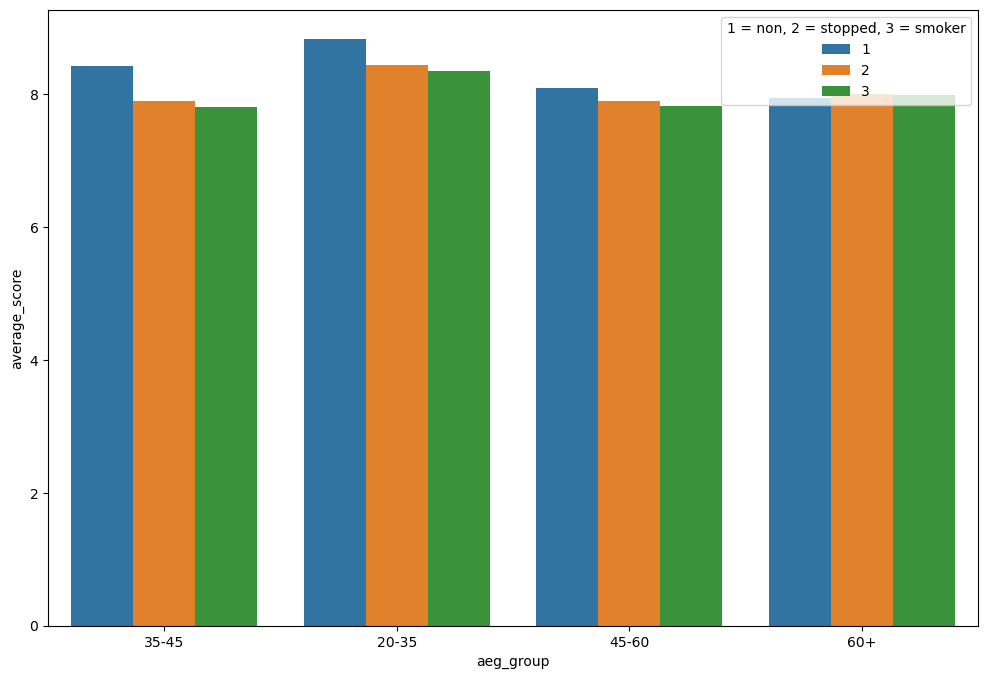

In [53]:
fig, axes = plt.subplots( figsize=(12, 8))
sns.barplot(data = data_df, x='aeg_group', y='average_score', hue = 'SMK_stat_type_cd',errorbar=None)
plt.legend(title="1 = non, 2 = stopped, 3 = smoker", loc=('upper right')) 

plt.show()

### <b id="section_2">  </b> <b style='color:#bauk'>2. • Is it possible to assess whether a person smokes or drinks based on medical data only? </b> <b></b> 

### <b id="section_2">  </b> <b style='color:#bauk'>3. Does alcohol affect vision or hearing </b> <b></b> 

<span style="color: green;">Testing in men</span>


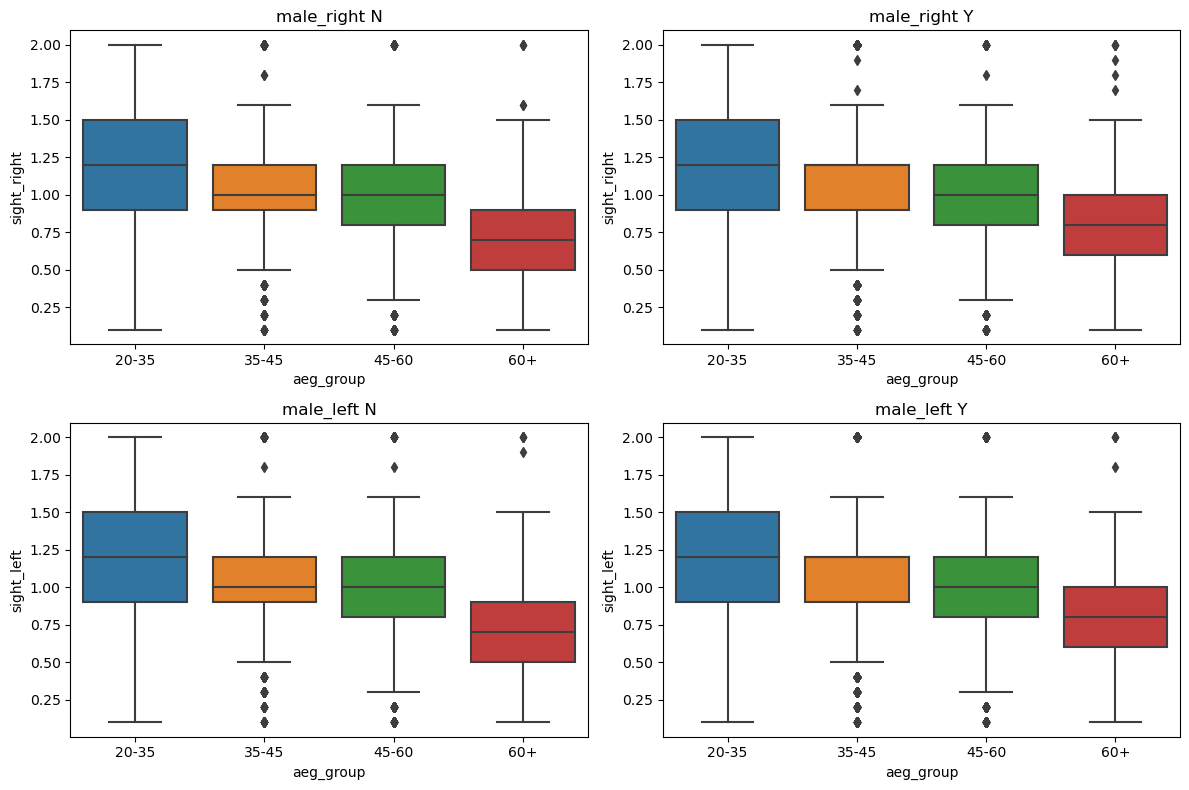

In [55]:
sight_male_df1 = male_df[male_df["sight_right"]<8.0]
sight_male_df1 = sight_male_df1[sight_male_df1["sight_left"]<8.0]
sight_male_df_no = sight_male_df1[sight_male_df1["DRK_YN"] == 0]

sight_male_df2 = male_df[male_df["sight_right"]<8.0]
sight_male_df2 = sight_male_df2[sight_male_df2["sight_left"]<8.0]
sight_male_df_yes = sight_male_df2[sight_male_df2["DRK_YN"] == 1]


fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.6)
categories = ["20-35","35-45","45-60","60+"]
sns.boxplot(x='aeg_group', y='sight_right', data=sight_male_df_no, order = categories ,ax = axes[0,0])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_male_df_no, order = categories, ax = axes[1,0])
sns.boxplot(x='aeg_group', y='sight_right', data=sight_male_df_yes, order = categories, ax = axes[0,1])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_male_df_yes, order = categories, ax = axes[1,1])

axes[0,0].set_title('male_right N')
axes[1,0].set_title('male_left N')
axes[0,1].set_title('male_right Y')
axes[1,1].set_title('male_left Y')
plt.tight_layout()
plt.show()

ניתן לראות שאין הבדלים ניכרים של עין ימין ושמאל בשני הקבוצות, אך בין המעשנים ואלו שלא ישנם הבדלים מסויימים, לכן ננסה לראות בצורה מדוייקת יותר

In [ ]:
sight_male_df_yes["sight"] = (sight_male_df_yes["sight_right"] + sight_male_df_yes["sight_left"]) / 2
sight_male_df_no["sight"] = (sight_male_df_no["sight_right"] + sight_male_df_no["sight_left"]) / 2



In [ ]:
sight_male_df_yes_1 = sight_male_df_yes.groupby('aeg_group')['sight_right'].describe().T
sight_male_df_yes_1

In [ ]:
sight_male_df_no_1 = sight_male_df_yes.groupby('aeg_group')['sight_right'].describe().T
sight_male_df_no_1

ניתן לראות שהראייה בקרב אלו שנוהגים לשתות אלכוהול לא פחותה ולעיתים אף טובה יותר מאלו שאינם שותים

<span style="color: green;">Testing in women</span>

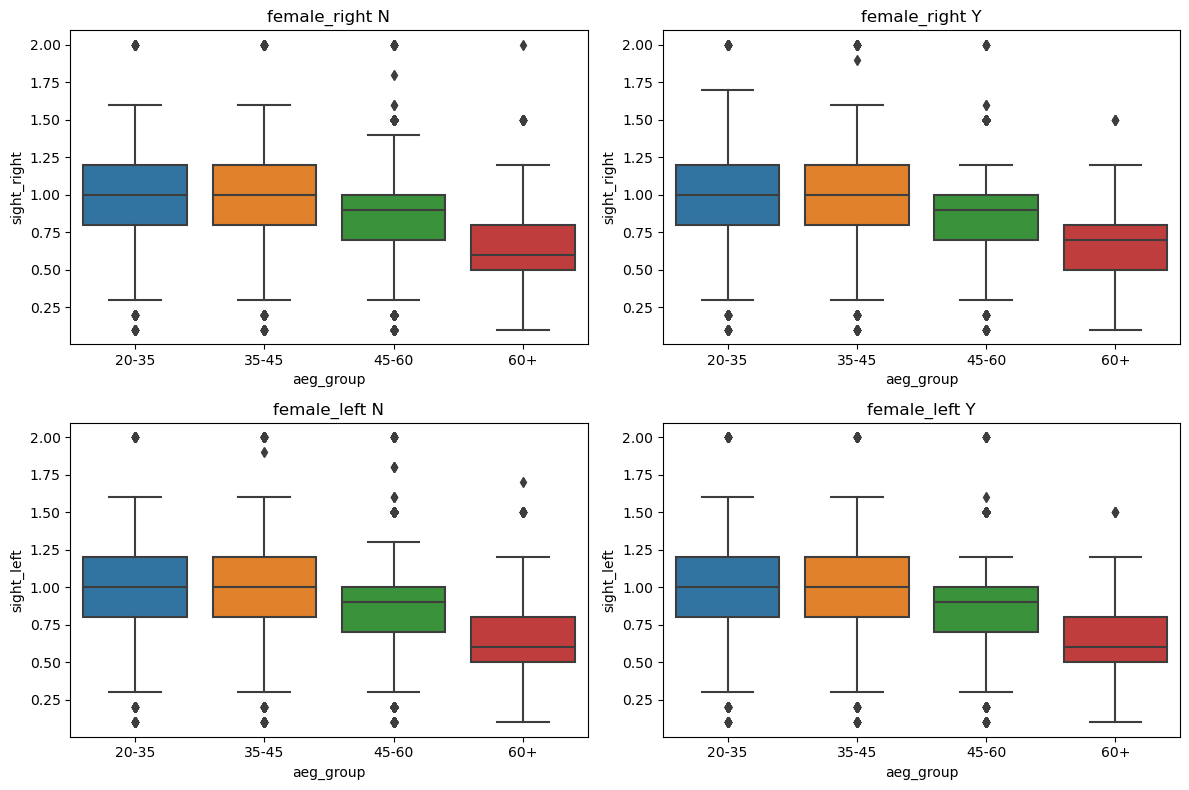

In [54]:
sight_female_df1 = female_df[female_df["sight_right"]<8.0]
sight_female_df1 = sight_female_df1[sight_female_df1["sight_left"]<8.0]
sight_female_df_no = sight_female_df1[sight_female_df1["DRK_YN"] == 0]

sight_female_df2 = female_df[female_df["sight_right"]<8.0]
sight_female_df2 = sight_female_df2[sight_female_df2["sight_left"]<8.0]
sight_female_df_yes = sight_female_df2[sight_female_df2["DRK_YN"] == 1]


fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.6)
categories = ["20-35","35-45","45-60","60+"]
sns.boxplot(x='aeg_group', y='sight_right', data=sight_female_df_no, order = categories ,ax = axes[0,0])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_female_df_no, order = categories, ax = axes[1,0])
sns.boxplot(x='aeg_group', y='sight_right', data=sight_female_df_yes, order = categories, ax = axes[0,1])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_female_df_yes, order = categories, ax = axes[1,1])

axes[0,0].set_title('female_right N')
axes[1,0].set_title('female_left N')
axes[0,1].set_title('female_right Y')
axes[1,1].set_title('female_left Y')
plt.tight_layout()
plt.show()

כפי שניתן לראות גם אצל נשים אין קשר בין שתיית אלכוהול לבין איכות הראיה

### <b id="section_2">  </b> <b style='color:#bauk'>3.  Does smoking affect vision </b> <b></b> 

<span style="color: green;">Testing in men</span>

In [1]:
sight_male_df10 = male_df[male_df["sight_right"]<8.0]
sight_male_df10 = sight_male_df10[sight_male_df10["sight_left"]<8.0]
sight_male_df_non = sight_male_df10[sight_male_df10["SMK_stat_type_cd"] == 1]
sight_male_df_quit = sight_male_df10[sight_male_df10["SMK_stat_type_cd"] == 2]
sight_male_df_still = sight_male_df10[sight_male_df10["SMK_stat_type_cd"] == 3]



fig, axes = plt.subplots(2,3, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.6)
categories = ["20-35","35-45","45-60","60+"]
sns.boxplot(x='aeg_group', y='sight_right', data=sight_male_df_non, order = categories ,ax = axes[0,0])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_male_df_non, order = categories, ax = axes[1,0])
sns.boxplot(x='aeg_group', y='sight_right', data=sight_male_df_quit, order = categories, ax = axes[0,1])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_male_df_quit, order = categories, ax = axes[1,1])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_male_df_still, order = categories, ax = axes[0,2])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_male_df_still, order = categories, ax = axes[1,2])

axes[0,0].set_title('male_right no')
axes[1,0].set_title('male_left no')
axes[0,1].set_title('male_right quit')
axes[1,1].set_title('male_left quit')
axes[0,2].set_title('male_right still')
axes[1,2].set_title('male_left still')

plt.tight_layout()
plt.show()

NameError: name 'male_df' is not defined

<span style="color: green;">Testing in women</span>

In [ ]:
sight_female_df10 = female_df[female_df["sight_right"]<8.0]
sight_female_df10 = sight_female_df10[sight_female_df10["sight_left"]<8.0]
sight_female_df_non = sight_female_df10[sight_female_df10["SMK_stat_type_cd"] == 1]
sight_female_df_quit = sight_female_df10[sight_female_df10["SMK_stat_type_cd"] == 2]
sight_female_df_still = sight_female_df10[sight_female_df10["SMK_stat_type_cd"] == 3]



fig, axes = plt.subplots(2,3, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.6)
categories = ["20-35","35-45","45-60","60+"]
sns.boxplot(x='aeg_group', y='sight_right', data=sight_female_df_non, order = categories ,ax = axes[0,0])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_female_df_non, order = categories, ax = axes[1,0])
sns.boxplot(x='aeg_group', y='sight_right', data=sight_female_df_quit, order = categories, ax = axes[0,1])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_female_df_quit, order = categories, ax = axes[1,1])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_female_df_still, order = categories, ax = axes[0,2])
sns.boxplot(x='aeg_group', y='sight_left', data=sight_female_df_still, order = categories, ax = axes[1,2])

axes[0,0].set_title('female_right no')
axes[1,0].set_title('female_left no')
axes[0,1].set_title('female_right quit')
axes[1,1].set_title('female_left quit')
axes[0,2].set_title('female_right still')
axes[1,2].set_title('female_left still')

plt.tight_layout()
plt.show()

ניתן לראות ירידה מסויימת דווקא אצל הנשים שעישנו והפסיקו, אך מכיוון שקבוצה זאת יחסית קטנה ויכולה להיות מושפעת מגורמים רבים נוספים, בסטייה קטנה קשה להגיע למסקנה חותכת

#### <b id="section_2">  </b> <b style='color:#bauk'>4. • Are there differences between men and women in the quality of vision, and check height fading age </b> <b></b> 

Average sight by age group

In [2]:
data_df["sight"] = (data_df["sight_right"] + data_df["sight_left"]) / 2
data_df_sight = data_df.groupby(["aeg_group","gender"])["sight"].mean()
data_df_sight= data_df_sight.to_frame(name="data_df_sight").reset_index()
data_df_sight_named = data_df_sight.rename(columns={"data_df_sight": "sight_mean"})
data_df_sight_named

NameError: name 'data_df' is not defined

Average height by age group

In [ ]:
data_df_height = data_df.groupby(["aeg_group","gender"])["height"].mean()
data_df_height= data_df_height.to_frame(name="data_df_height").reset_index()
data_df_height = data_df_height.rename(columns={"data_df_height": "height_mean"})
data_df_height

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 8))
sns.barplot(data = data_df_sight_named, x='aeg_group', y='sight_mean', hue = 'gender',errorbar=None, ax = axes[0])
sns.barplot(data = data_df_height, x='aeg_group', y='height_mean', hue = 'gender',errorbar=None, ax = axes[1])
axes[0].set_title('sight_mean')
axes[1].set_title('height_mean')
plt.legend(title="", loc=('upper right')) 
plt.show()

באיכות הראייה ניתן לראות פער בכל הגילאים בין גברים לנשים, אך ההתדרדרות נעשית באותו קצב בסופו של דבר
בגובה ניתן לראות שהדעיכה גם אצל גברים וגם אצל נשים מתחילה בקבוצת הגיל השנייה 